# Redução de Dimensionalidade - Segundo Desafio de Projeto

Seguindo as orientações do professor Diego Renan, nesse desafio de projeto devemos implementar um algoritmo, sem utilizar nenhuma biblioteca (opencv etc), para reduzir a dimensionalidade de uma imagem colorida para tons de cinza e preto e branco.

*Following the instructions of Professor Diego Renan, in this project we must implement an algorithm, without using any libraries (such as OpenCV), to reduce the color dimensionality of an image to grayscale and black and white.*


***Importante: matplotlib e PIL serão usadas apenas para visualizar as imagens, toda conversão será feita através de arrays numpy e funções escritas baseados em artigos sobre o assunto***

***Important: matplotlib and PIL will be used only for image visualization, all conversion will be done through numpy arrays and functions written based on articles on the subject***

In [1]:
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt

Usaremos o módulo fíles para fazer o upload da imagem que iremos usar.

We're going to utilize the colab files module for uploading our image.

In [2]:
uploaded = files.upload()

Saving 480.jpg to 480.jpg


Uma breve explicação sobre o código abaixo

* `uploaded[list(uploaded.keys())[0]]` acessa os bytes do arquivo.
* `io.BytesIO(uploaded[list(uploaded.keys())[0]])` converte os dados do arquivo em um fluxo de bytes, que é compatível com a função Image.open da biblioteca PIL.
* `Image.open(io.BytesIO(uploaded[list(uploaded.keys())[0]]))` abre a imagem do fluxo de bytes criado na etapa anterior.







*A brief explanation on the code below*

*   `uploaded[list(uploaded.keys())[0]]` *accesses the actual file data (bytes) for that file name.*
*   `io.BytesIO(uploaded[list(uploaded.keys())[0]])` *converts the file data into a byte stream, which is compatible with the Image.open function from the PIL library.*
*   `Image.open(io.BytesIO(uploaded[list(uploaded.keys())[0]]))` *opens the image from the byte stream created in the previous step.*

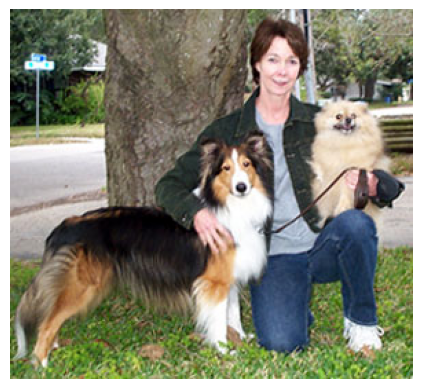

In [3]:
image = Image.open(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
plt.imshow(image)
plt.axis('off')
plt.show()

Agora usaremos a biblioteca numpy para representar a dimensionalidade da imagem em altura, largura e canais de cores

*Now we will use the numpy library to represent the dimensionality of the image in height, width and color channels.*

In [4]:
import numpy as np

img = np.asarray(image)
print(img.shape)

(269, 293, 3)


Para acessar os valores RGB do primeiro pixel da imagem, você pode usar os indexes diretamente no array NumPy. O primeiro pixel está localizado no canto superior esquerdo da imagem, que corresponde às coordenadas (0, 0) no array.

*To access the RGB values of the first pixel in the image, you can directly index into the NumPy array. The first pixel is located at the top-left corner of the image, which corresponds to the coordinates (0, 0) in the array.*

In [5]:
first_pixel_rgb = img[0, 0]
print(first_pixel_rgb)

[29 39 28]


A ideia por trás de transformar uma imagem em níveis de cinza (0 a 255) ou em preto e branco (0 a 255), sem utilizar nenhuma biblioteca, por ser alcançada através de código simples, entendendo os fundamentos de como a imagem é processada e apresentada através do método `plt.imshow()`.

`plt.imshow()` é um método que exibe dados como uma imagem, ou seja, em um bitmap regular 2D. A entrada pode ser dados RGB(A) ou dados escalares 2D, que serão renderizados como uma imagem pseudocolorida.

Como padrão, o método `plt.imshow()` usa o colormap (matriz de cores usada para mapear dados de pixel) `default=viridis` onde o espectro de cores respeita a imagem a seguir

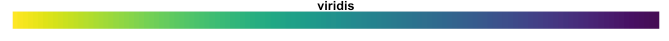

*The idea of transforming an image into grayscale (0 to 255) or black and white (0 to 255), without using any library, can be achieved through simple code, understanding the fundamentals of how the image is processed and presented through the `plt.imshow()` method.*

*`plt.imshow()` is a method that displays data as an image, that is, in a regular 2D bitmap. The input can be RGB(A) data or 2D scalar data, which will be rendered as a pseudo-color image.*

*By default, the `plt.imshow()` method uses the colormap (color matrix used to map pixel data) `default=viridis` where the color spectrum respects the following image*

Podemos fazer um loop simples para então termos a média dos três valores RGB de cada pixel, fazendo uma redução de dimensionalidade de 3 canais de cores para apenas 1 canal entre 0 e 255.

Primeiramente criaremos um novo array NumPy que conterá as médias de cada valor RGB de cada pixel

*We can make a simple loop to get the average of the three RGB values of each pixel, reducing the dimensionality from 3 color channels to just 1 channel between 0 and 255.*

*First, we will create a new NumPy array that will contain the averages of each RGB value of each pixel.*

In [6]:
row, col, channel = img.shape
img_onedim = np.zeros((row,col,1))

Agora fazendo o nested loop simples para cada linha e coluna, registraremos o novo valor da média dos 3 canais.

*Now doing the simple nested loop for each row and column, we will record the new value of the average of the 3 channels.*

<ipython-input-7-bc4410d0419a>:7: RuntimeWarning: overflow encountered in scalar add
  gray_val = (R+G+B) / 3


(269, 293, 1)


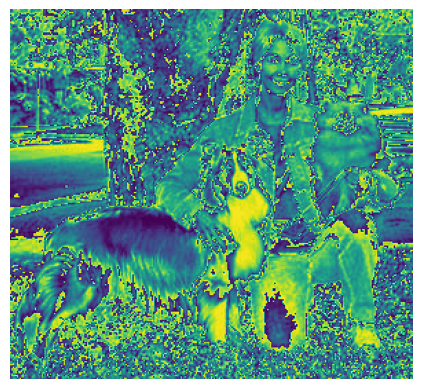

In [7]:
for r in range(row):
  for c in range(col):
    R = img[r,c,0]
    G = img[r,c,1]
    B = img[r,c,2]

    gray_val = (R+G+B) / 3
    img_onedim[r,c,]=gray_val

print(img_onedim.shape)
plt.imshow(img_onedim)
plt.axis('off')
plt.show()

Como visto acima a imagem condiz com o padrão de colormap que o método `plt.imshow()` tem como default.

Mas há uma maneira de, ainda utilizando o padrão `viridis`, fazendo uma normalização de cada valor RGB e o registrando num array NumPy com 3 dimensionalidades de cor, ainda assim mostrar uma imagem em escalas de cinza.

Dessa vez, ao invés de usar a média dos valores, utilizaremos a norma BT.709 recomendada pela International Telecommunication Union (ITU) para conversão em escalas de cinza.

*As seen above, the image matches the default colormap of `plt.imshow()` method.*

*But there is a way to still use the `viridis` standard, by normalizing each RGB value and recording it in a NumPy array with 3 color dimensions, and still display an image in grayscale.*

*This time, instead of using the average of the values, we will use the BT.709 standard recommended by the International Telecommunication Union (ITU) for grayscale conversion.*

In [8]:
img_gray = np.zeros((row, col, 3))

(269, 293, 3)


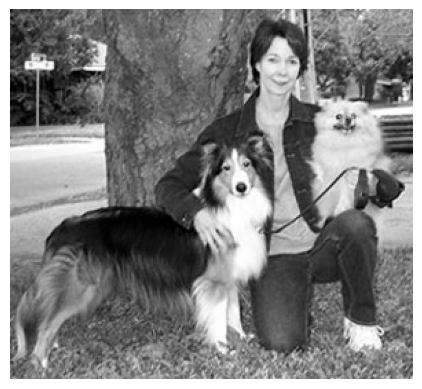

In [9]:
for r in range(row):
  for c in range(col):
    R = img[r,c,0]
    G = img[r,c,1]
    B = img[r,c,2]

    gray_val = (R*0.299+G*0.587+B*0.114) / 255
    img_gray[r,c,0]=gray_val
    img_gray[r,c,1]=gray_val
    img_gray[r,c,2]=gray_val

print(img_gray.shape)
plt.imshow(img_gray)
plt.axis('off')
plt.show()

Note que mesmo utilizando um array com 3 dimensionalidades de cor, a normalização por 255 coloca os valores de RGB para cada pixel entre 0 e 1, como podemos ver pelo trecho de código a seguir.

*Note that even using an array with 3 color dimensions, normalization by 255 places the RGB values for each pixel between 0 and 1, as we can see in the following code snippet.*

In [10]:
first_pixel_gray = img_gray[0, 0]
print(first_pixel_gray)

second_pixel_gray = img_gray[110,110]
print(second_pixel_gray)

[0.13629804 0.13629804 0.13629804]
[0.67402353 0.67402353 0.67402353]


Mas como queremos reduzir a dimensionalidade de 3 canais de cores para apenas 1 canal, podemos utilizar outro colormap para alcançar a imagem em escala de cinza.

*But since we want to reduce the dimensionality from 3 color channels to just 1 channel, we can use another colormap to achieve the grayscale image.*



------------------------------------------------ IMAGEM S/ CMAP------------------------------------------------


(269, 293, 1)


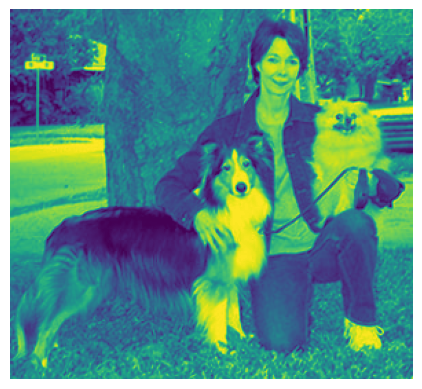



------------------------------------------------ IMAGEM C/ CMAP------------------------------------------------


(269, 293, 1)


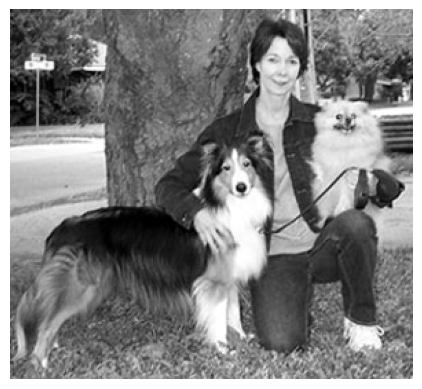



------------------------------------------------ VALOR PRIMEIRO PIXEL ------------------------------------------------


[0.13629804]


In [17]:
img_gray_2d = np.zeros((row,col,1))

for r in range(row):
  for c in range(col):
    R = img_gray[r,c,0]
    img_gray_2d[r,c]=R

print('''

------------------------------------------------ IMAGEM S/ CMAP------------------------------------------------

''')
print(img_gray_2d.shape)
plt.imshow(img_gray_2d)
plt.axis('off')
plt.show()

print('''

------------------------------------------------ IMAGEM C/ CMAP------------------------------------------------

''')
print(img_gray_2d.shape)
plt.imshow(img_gray_2d,cmap='gray')
plt.axis('off')
plt.show()

print('''

------------------------------------------------ VALOR PRIMEIRO PIXEL ------------------------------------------------

''')
print(img_gray_2d[0,0])

Como podemos perceber, as duas imagens acima contem apenas 1 canal mas o tipo de colormap escolhido definirá a saída da imagem.

Podemos fazer a mesma lógica para a imagem em preto e branco, desta vez colocando um threashold dentro do loop que delimitará se um pixel tera o valor 0,0,0 ou 255,255,255 no padrão RGB.

*As we can see, the two images above contain only 1 channel, but the type of colormap chosen will define the image output.*

*We can apply the same logic to the black and white image, this time placing a threshold inside the loop that will determine whether a pixel will have the value 0,0,0 or 255,255,255 in the RGB standard.*

In [12]:
img_bw = np.zeros((row,col,3))

(269, 293, 3)


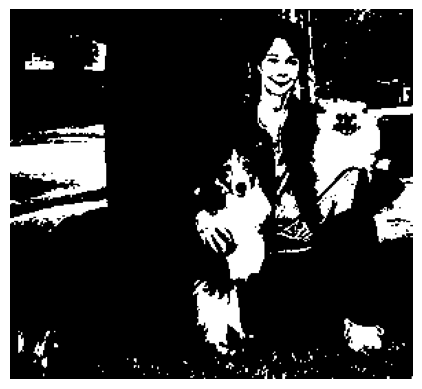

In [22]:
threshold = 0.7423
for r in range(row):
  for c in range(col):
    R = img[r,c,0]
    G = img[r,c,1]
    B = img[r,c,2]

    gray_val = (R*0.299+G*0.587+B*0.114) / 255

    if gray_val > threshold:
            bw_val = 255  # White
    else:
            bw_val = 0  # Black

    img_bw[r,c,0]=bw_val
    img_bw[r,c,1]=bw_val
    img_bw[r,c,2]=bw_val

print(img_bw.shape)
plt.imshow(img_bw)
plt.axis('off')
plt.show()

Seguindo a mesma lógica que alcançamos com a utilização do cmap, iremos reduzir a dimensionalidade de 3 canais para apenas 1 e utilizar o cmap para balancearmos as diferenças entre os dois métodos.

*Following the same logic that we achieved with the use of cmap, we will reduce the dimensionality of 3 channels to just 1 and use cmap to balance the differences between the two methods.*



------------------------------------------------ IMAGEM S/ CMAP------------------------------------------------


(269, 293, 1)


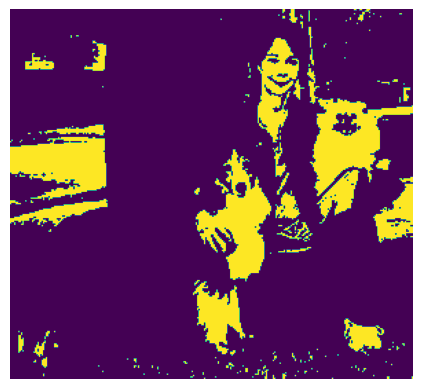



------------------------------------------------ IMAGEM C/ CMAP------------------------------------------------


(269, 293, 1)


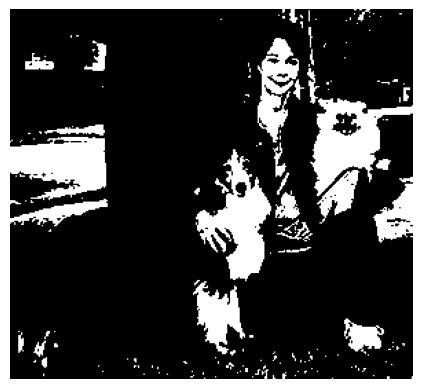



------------------------------------------------ VALOR PRIMEIRO PIXEL ------------------------------------------------


[0.]


In [25]:
img_bw_2d = np.zeros((row,col,1))

for r in range(row):
  for c in range(col):
    R = img_bw[r,c,0]
    img_bw_2d[r,c]=R

print('''

------------------------------------------------ IMAGEM S/ CMAP------------------------------------------------

''')
print(img_bw_2d.shape)
plt.imshow(img_bw_2d)
plt.axis('off')
plt.show()

print('''

------------------------------------------------ IMAGEM C/ CMAP------------------------------------------------

''')
print(img_bw_2d.shape)
plt.imshow(img_bw_2d,cmap='gist_gray')
plt.axis('off')
plt.show()

print('''

------------------------------------------------ VALOR PRIMEIRO PIXEL ------------------------------------------------

''')
print(img_bw_2d[0,0])

# Referências

[***Seven grayscale conversion algorithms (with pseudocode and VB6 source code) - Tanner Helland***](https://tannerhelland.com/2011/10/01/grayscale-image-algorithm-vb6.html)

[***Introduction to the viridis color maps - Bob Rudis, Noam Ross and Simon Garnier***](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)